In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Bupa\Bupa_NG_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6
0,85.0,92.0,45.0,27.0,31.0,0.0
1,NaN,64.0,59.0,32.0,23.0,NaN
2,86.0,54.0,33.0,16.0,NaN,0.0
3,91.0,78.0,34.0,24.0,36.0,0.0
4,98.0,55.0,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
340,91.0,54.0,25.0,22.0,35.0,4.0
341,89.0,48.0,32.0,22.0,14.0,NaN
342,85.0,52.0,NaN,23.0,34.0,4.0
343,95.0,NaN,21.0,27.0,47.0,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	45
float64		column 2	11
float64		column 3	34
float64		column 4	33
float64		column 5	44
float64		column 6	34


In [4]:

df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6
count,300.000000,334.000000,311.000000,312.000000,301.000000,311.000000
mean,90.116667,69.760479,30.032154,24.714744,37.488372,3.541801
std,4.355797,18.283950,17.722746,9.870482,36.852282,3.358406
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000
25%,88.000000,57.000000,20.000000,19.000000,15.000000,0.500000
50%,90.000000,67.000000,26.000000,23.000000,26.000000,3.000000
75%,92.000000,79.000000,34.000000,27.000000,44.000000,6.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000


<AxesSubplot:>

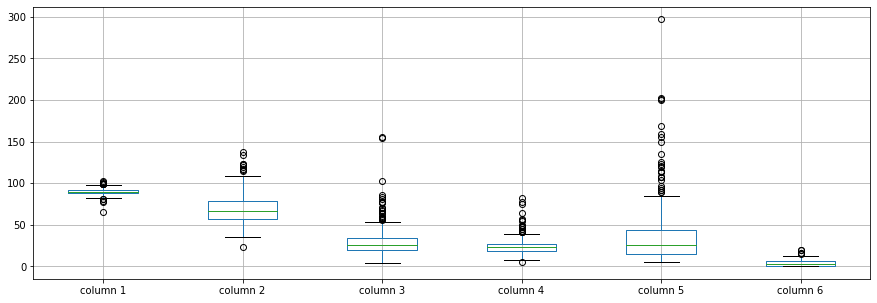

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    90.116667
column 2    69.760479
column 3    30.032154
column 4    24.714744
column 5    37.488372
column 6     3.541801
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6
column 1,1.000000,0.052003,0.074661,0.174629,0.170638,0.329819
column 2,0.052003,1.000000,0.067858,0.137733,0.119303,0.103113
column 3,0.074661,0.067858,1.000000,0.669843,0.482528,0.205812
column 4,0.174629,0.137733,0.669843,1.000000,0.514320,0.314345
column 5,0.170638,0.119303,0.482528,0.514320,1.000000,0.293460
column 6,0.329819,0.103113,0.205812,0.314345,0.293460,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [6,6+38,6+38+38,6+38+38+38,6+38+38+38+38,6+38+38+38,6+38+38,6+38,6], vae_layer = False, seed = 380)
imputer.build_model(df)
imputer.train_model(training_epochs=38)


Size index: [6]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 249.50153169177827
Epoch: 1 , loss: 250.27435302734375
Epoch: 2 , loss: 249.85201663062685
Epoch: 3 , loss: 250.05037071591332
Epoch: 4 , loss: 249.80993579682848
Epoch: 5 , loss: 250.1335696265811
Epoch: 6 , loss: 251.0297553652809
Epoch: 7 , loss: 249.2310791015625
Epoch: 8 , loss: 249.30910019647507
Epoch: 9 , loss: 251.1088409423828
Epoch: 10 , loss: 249.53344944545202
Epoch: 11 , loss: 249.50972711472284
Epoch: 12 , loss: 249.47593906947546
Epoch: 13 , loss: 250.28089541480654
Epoch: 14 , loss: 249.6526627313523
Epoch: 15 , loss: 248.73449125744048
Epoch: 16 , loss: 249.69949994768416
Epoch: 17 , loss: 249.5504339308966
Epoch: 18 , loss: 250.03810555594308
Epoch: 19 , loss: 249.7969985235305
Epoch: 20 , loss: 249.94536844889322
Epoch: 21 , loss: 249.56273324148995
Epoch: 22 , loss: 248.15156773158483
Epoch: 23 , loss: 246.6055704752604
Epoch: 24 , loss: 242.68512035551527
Epoch: 25 , loss: 237.4818

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(345, 6)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    90.0
column 2    47.0
column 3    28.0
column 4    15.0
column 5    18.0
column 6     0.5
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Bupa.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-28.634132,0.000000,0.000000,0.000000,0.000000,3.937065
2,0.000000,0.000000,0.000000,0.000000,-34.781467,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,13.174391,5.775446,12.230015,0.000000
...,...,...,...,...,...,...
340,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
341,0.000000,0.000000,0.000000,0.000000,0.000000,-3.135105
342,0.000000,0.000000,1.053129,0.000000,0.000000,0.000000
343,0.000000,-49.954639,0.000000,0.000000,0.000000,-3.006965


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

640.5702555648729

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

2519.762091944396

In [20]:
NRMS=numerator/denominator
NRMS


0.25421854611304645

In [21]:
new_df.iloc[66,:]

column 1    86.00000
column 2    54.00000
column 3    20.00000
column 4    11.44753
column 5    16.00000
column 6     2.00000
Name: 66, dtype: float64

In [22]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6
0,85.000000,92.000000,45.000000,27.000000,31.000000,0.000000
1,56.365868,64.000000,59.000000,32.000000,23.000000,3.937065
2,86.000000,54.000000,33.000000,16.000000,19.218533,0.000000
3,91.000000,78.000000,34.000000,24.000000,36.000000,0.000000
4,98.000000,55.000000,26.174391,22.775446,29.230015,0.000000
...,...,...,...,...,...,...
340,91.000000,54.000000,25.000000,22.000000,35.000000,4.000000
341,89.000000,48.000000,32.000000,22.000000,14.000000,0.864895
342,85.000000,52.000000,23.053129,23.000000,34.000000,4.000000
343,95.000000,43.045361,21.000000,27.000000,47.000000,2.993035


In [23]:
imputations[-1].to_excel("Bupa_NG_10(imp).xlsx", index=False, header=False)